In [45]:
#Import libraries
import os
import pandas as pd
import numpy as np

#import libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [46]:
#Set working directory
os.chdir("C:/Users/blankspace/00_EdWisor_Projects/Project_1_Bike_Rental_Prediction_Mayank")
print(os.getcwd())

C:\Users\blankspace\00_EdWisor_Projects\Project_1_Bike_Rental_Prediction_Mayank


In [47]:
#Read the csv file
day = pd.read_csv("day.csv", sep=",")

In [48]:
#Get the number of rows and columns
day.shape

(731, 16)

In [49]:
#Get first 5 rows
print(day.head())

#Get the data types of variables
print(day.dtypes)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
instant         int64
dted

In [50]:
#Create a new dataframe containing required columns and creating new columns
df = day.copy()
df.head()

#Create new columns
df['actual_temp'] = day['temp'] * 39
df['actual_feel_temp'] = day['atemp'] * 50
df['actual_windspeed'] = day['windspeed'] * 67
df['actual_hum'] = day['hum'] * 100

df['actual_season'] = day['season'].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])
df['actual_yr'] = day['yr'].replace([0,1],["2011","2012"])
df['actual_holiday'] = day['holiday'].replace([0,1],["Working day","Holiday"])
df['actual_weathersit'] = day['weathersit'].replace([1,2,3,4],["Clear","Cloudy/Mist","Rain/Snow/Fog","Heavy Rain/Snow/Fog"])

In [51]:
#Check the data types od variables
df.dtypes

#Change the data types
df['weathersit'] = df['weathersit'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['yr'] = df['yr'].astype('category')
df['season'] = df['season'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['actual_season'] = df['actual_season'].astype('category')
df['actual_yr'] = df['actual_yr'].astype('category')
df['actual_holiday'] = df['actual_holiday'].astype('category')
df['actual_weathersit'] = df['actual_weathersit'].astype('category')

df.dtypes

instant                 int64
dteday                 object
season               category
yr                   category
mnth                 category
holiday              category
weekday              category
workingday           category
weathersit           category
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                  int64
registered              int64
cnt                     int64
actual_temp           float64
actual_feel_temp      float64
actual_windspeed      float64
actual_hum            float64
actual_season        category
actual_yr            category
actual_holiday       category
actual_weathersit    category
dtype: object

In [52]:
#Check the count of values of categorical variables
print(df.workingday.value_counts())
print(df.weekday.value_counts())
print(df.mnth.value_counts())
print(df.actual_yr.value_counts())
print(df.actual_holiday.value_counts())
print(df.actual_weathersit.value_counts())

1    500
0    231
Name: workingday, dtype: int64
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
2012    366
2011    365
Name: actual_yr, dtype: int64
Working day    710
Holiday         21
Name: actual_holiday, dtype: int64
Clear            463
Cloudy/Mist      247
Rain/Snow/Fog     21
Name: actual_weathersit, dtype: int64


In [53]:
#Check if there are missing values
df.isnull().sum()

instant              0
dteday               0
season               0
yr                   0
mnth                 0
holiday              0
weekday              0
workingday           0
weathersit           0
temp                 0
atemp                0
hum                  0
windspeed            0
casual               0
registered           0
cnt                  0
actual_temp          0
actual_feel_temp     0
actual_windspeed     0
actual_hum           0
actual_season        0
actual_yr            0
actual_holiday       0
actual_weathersit    0
dtype: int64

C:\Users\blankspace\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\blankspace\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


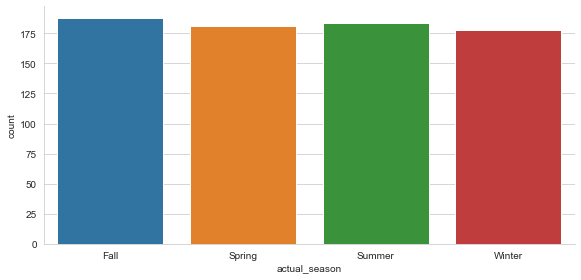

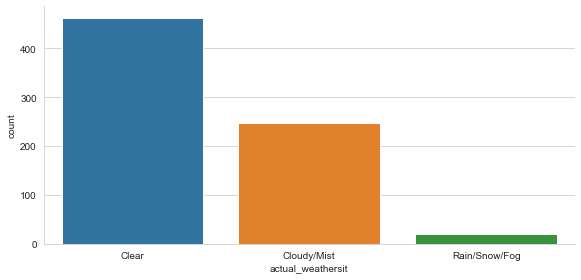

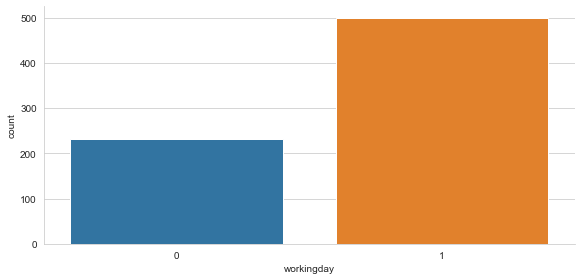

In [54]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=df, x='actual_season', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='actual_weathersit', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='workingday', kind= 'count',size=4,aspect=2)


Text(0.5, 1.0, 'Temperature Distribution')

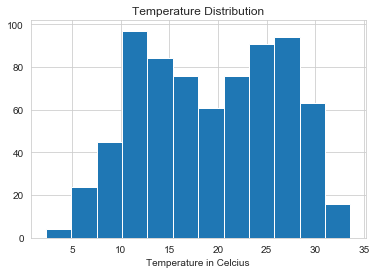

In [55]:
#Check the distribution of numerical data using histogram
plt.hist(data=df, x='actual_temp', bins='auto', label='Temperature')
plt.xlabel('Temperature in Celcius')
plt.title("Temperature Distribution")

Text(0.5, 1.0, 'Humidity Distribution')

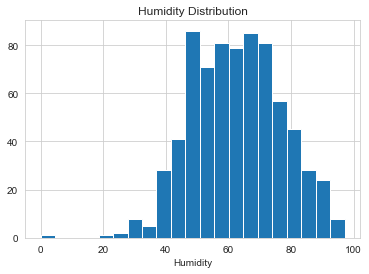

In [56]:
#Check the distribution of numerical data using histogram
plt.hist(data=df, x='actual_hum', bins='auto', label='Temperature')
plt.xlabel('Humidity')
plt.title("Humidity Distribution")

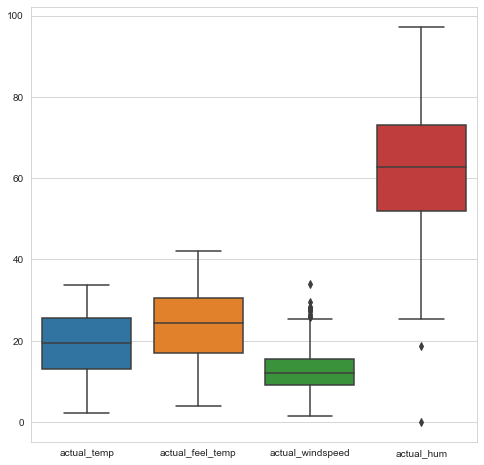

In [57]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['actual_temp','actual_feel_temp','actual_windspeed','actual_hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [58]:
#Remove outliers in Humidity
q75, q25 = np.percentile(df['actual_hum'], [75 ,25])
print(q75,q25)
iqr = q75 - q25
print(iqr)
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

df = df.drop(df[df.iloc[:,19] < min].index)
df = df.drop(df[df.iloc[:,19] > max].index)

73.02085 52.0
21.020849999999996
20.468725000000006
104.55212499999999


In [59]:
#Remove outliers in Windspeed
q75, q25 = np.percentile(df['actual_windspeed'], [75 ,25])
print(q75,q25)
iqr = q75 - q25
print(iqr)
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

df = df.drop(df[df.iloc[:,18] < min].index)
df = df.drop(df[df.iloc[:,18] > max].index)

15.624668 9.041649999999999
6.583018000000001
-0.8328770000000016
25.499195


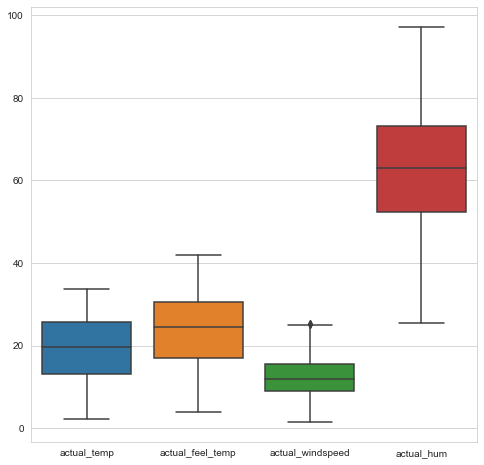

In [60]:
sns.boxplot(data=df[['actual_temp','actual_feel_temp','actual_windspeed','actual_hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)

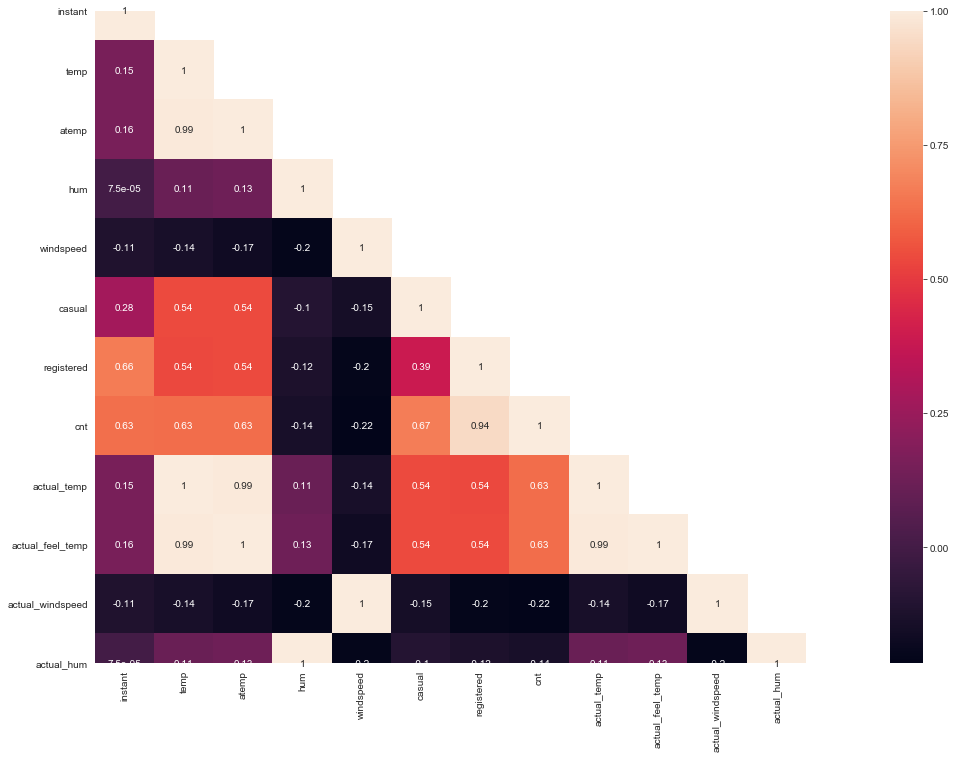

In [61]:
#Check for collinearity using corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Text(0, 0.5, 'Count of bikes')

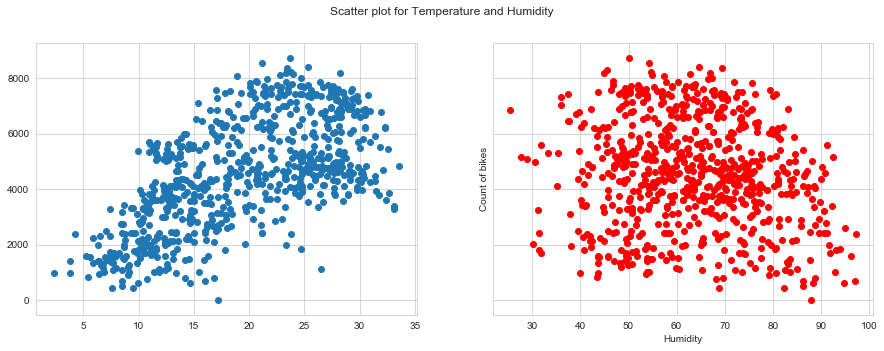

In [62]:
#Check the distribution of Temperature and Humdity against Bike rental count using scatter plot
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=df, x='actual_temp', y='cnt')
axs[1].scatter(data=df, x='actual_hum', y='cnt', color = 'red')
fig.suptitle('Scatter plot for Temperature and Humidity')
plt.xlabel("Humidity")
plt.ylabel("Count of bikes")

Text(0, 0.5, 'Count of bikes')

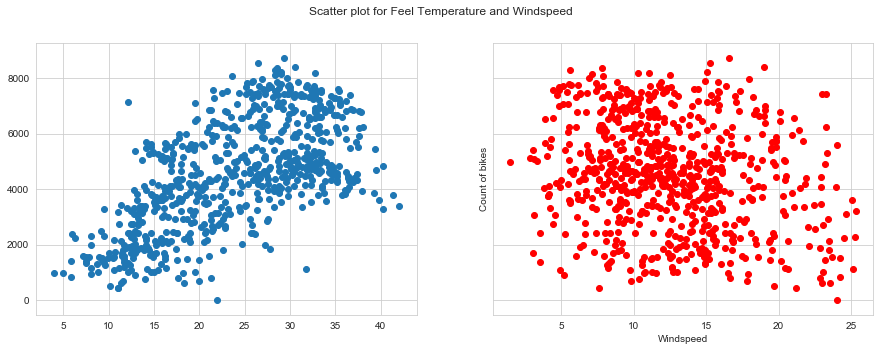

In [63]:
#Check the distribution of Feel Temperature and Windspeed against Bike rental count using scatter plot
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=df, x='actual_feel_temp', y='cnt')
axs[1].scatter(data=df, x='actual_windspeed', y='cnt', color = 'red')
fig.suptitle('Scatter plot for Feel Temperature and Windspeed')
plt.xlabel("Windspeed")
plt.ylabel("Count of bikes")

In [64]:
df = df.drop(columns=['holiday','instant','dteday','atemp','casual','registered','actual_temp','actual_feel_temp',
                      'actual_windspeed','actual_hum','actual_season','actual_yr','actual_holiday','actual_weathersit'])

## DECISION TREE
#MAPE: 18.40%
#Accuracy: 81.60%

In [65]:
#Import Libraries for decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [66]:
#Divide data into train and test
train,test = train_test_split(df, test_size = 0.2, random_state = 123)

In [67]:
#Train the model
dt_model = DecisionTreeRegressor(random_state=123).fit(train.iloc[:,0:9], train.iloc[:,9])

In [68]:
#Predict the results of test data
dt_predictions = dt_model.predict(test.iloc[:,0:9])

In [28]:
#Function for Mean Absolute Percentage Error
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))
    return mape

In [29]:
#Calculate MAPE for decision tree
MAPE(test.iloc[:,9],dt_predictions)
#MAPE: 18.40%
#Accuracy: 81.60%

0.18407710686962875

# Random Forest
#MAPE: 13.10%
#Accuracy:86.90%

In [30]:
#Import library for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
#Train the model
rf_model = RandomForestRegressor(n_estimators=500,random_state=123).fit(train.iloc[:,0:9], train.iloc[:,9])

In [32]:
#Predict the results of test data
rf_predictions = rf_model.predict(test.iloc[:,0:9])

In [33]:
#Create a dataframe for actual values and predicted values
df_rf = pd.DataFrame({'actual': test.iloc[:,9], 'pred': rf_predictions})
df_rf.head()

,actual,pred
226,4338,4535.294
430,3956,3262.924
649,7570,6815.408
653,5875,6814.228
342,3620,3588.416


In [34]:
#Calculate MAPE
MAPE(test.iloc[:,9],rf_predictions)
#MAPE: 13.10%
#Accuracy:86.90%

0.13103815551097941

# Linear Regression
#MAPE:17.07%
#Accuracy: 82.93%
#Adjusted r2: 0.852
#F-stat: 122.7

In [35]:
#import libraries for Linear regression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [36]:
#Train the model
lr_model = sm.OLS(train.iloc[:,9].astype(float), train.iloc[:,0:9].astype(float)).fit()

In [37]:
#Check the summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1852.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):                        0.00
Time:                        08:26:57   Log-Likelihood:                         -4702.3
No. Observations:                 573   AIC:                                      9423.
Df Residuals:                     564   BIC:                                      9462.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       501.2710     63.499      7.894      0.000     376.547     625.995
yr          2165.3818     73.646     29.403      0.000    2020.728    2310.035
mnth         -30.3433     19.923     -1.523      0.128     -69.475       8.788
weekday      113.7669     18.372      6.193      0.000      77.682     149.852
workingday   345.8864     80.004      4.323      0.000     188.745     503.028
weathersit  -720.5377     91.846     -7.845      0.000    -900.939    -540.137
temp        5362.5801    217.252     24.684      0.000    4935.859    5789.301
hum          373.1974    299.862      1.245      0.214    -215.786     962.181
windspeed   -688.6358    447.378     -1.539      0.124   -1567.367     190.095
==============================================================================
Omnibus:                      100.038   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.984
Skew:                          -0.914   Prob(JB):                     5.71e-52
Kurtosis:                       5.558   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Predict the results of test data
lr_predictions = lr_model.predict(test.iloc[:,0:9])

In [39]:
##Create a dataframe for actual values and predicted values
df_lr = pd.DataFrame({'actual': test.iloc[:,9], 'pred': lr_predictions})
df_lr.head()

,actual,pred
226,4338,4692.62
430,3956,3845.93
649,7570,6328.03
653,5875,5957.77
342,3620,3597.48


In [40]:
#Calclulate MAPE
MAPE(test.iloc[:,9],lr_predictions)
#MAPE:19.08%
#Accuracy: 81.92% 
#Adjusted r2: 0.967
#F-stat: 1852

0.19087009118495935

In [41]:
#Create continuous data. Save target variable first
train_lr = train[['cnt','temp','hum','windspeed']]
test_lr = test[['cnt','temp','hum','windspeed']]

In [42]:
##Create dummies for categorical variables
cat_names = ["season", "yr", "mnth", "weekday", "workingday", "weathersit"]

for i in cat_names:
    temp1 = pd.get_dummies(train[i], prefix = i)
    temp2 = pd.get_dummies(test[i], prefix = i)
    train_lr = train_lr.join(temp1)
    test_lr = test_lr.join(temp2)

In [43]:
#Train the model
lr_model = sm.OLS(train_lr.iloc[:,0].astype(float), train_lr.iloc[:,1:34].astype(float)).fit()

In [44]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          7.50e-212
Time:                        08:28:04   Log-Likelihood:                -4592.6
No. Observations:                 573   AIC:                             9241.
Df Residuals:                     545   BIC:                             9363.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp          4381.4701    450.285      9.730      0.000    3496.963    5265.977
hum          -1523.3499    341.146     -4.465      0.000   -2193.473    -853.227
windspeed    -2726.9664    487.751     -5.591      0.000   -3685.068   -1768.865
season_1      -473.9783    140.604     -3.371      0.001    -750.171    -197.786
season_2       481.9269    142.421      3.384      0.001     202.165     761.688
season_3       554.1141    150.919      3.672      0.000     257.660     850.568
season_4      1142.8856    144.645      7.901      0.000     858.756    1427.015
yr_0          -156.9180     97.966     -1.602      0.110    -349.355      35.519
yr_1          1861.8663     94.395     19.724      0.000    1676.443    2047.289
mnth_1        -106.9588    189.883     -0.563      0.573    -479.952     266.034
mnth_2          32.5532    183.780      0.177      0.859    -328.452     393.558
mnth_3         436.1779    143.510      3.039      0.002     154.278     718.078
mnth_4         234.0954    172.697      1.356      0.176    -105.139     573.329
mnth_5         547.9937    179.701      3.049      0.002     195.003     900.984
mnth_6         303.1254    174.171      1.740      0.082     -39.003     645.254
mnth_7        -394.1169    209.692     -1.880      0.061    -806.020      17.786
mnth_8          42.3989    196.938      0.215      0.830    -344.452     429.250
mnth_9         788.6541    158.610      4.972      0.000     477.093    1100.216
mnth_10        266.0922    178.715      1.489      0.137     -84.963     617.147
mnth_11       -325.1547    179.612     -1.810      0.071    -677.971      27.662
mnth_12       -119.9121    158.458     -0.757      0.450    -431.175     191.351
weekday_0      274.5790    154.001      1.783      0.075     -27.930     577.088
weekday_1       -5.0930     86.233     -0.059      0.953    -174.483     164.297
weekday_2       75.3095    106.442      0.708      0.480    -133.777     284.396
weekday_3      162.9934    103.742      1.571      0.117     -40.789     366.776
weekday_4      187.1645    102.813      1.820      0.069     -14.794     389.123
weekday_5      231.1440    101.850      2.269      0.024      31.078     431.210
weekday_6      778.8509    152.517      5.107      0.000     479.258    1078.443
workingday_0   532.9765    142.806      3.732      0.000     252.460     813.493
workingday_1  1171.9717    121.998      9.606      0.000     932.328    1411.616
weathersit_1  1378.6143     76.797     17.951      0.000    1227.759    1529.469
weathersit_2   934.0513     83.730     11.155      0.000     769.578    1098.525
weathersit_3  -607.7173    176.393     -3.445      0.001    -954.212    -261.223
==============================================================================
Omnibus:                      124.199   Durbin-Watson:                   1.979
Prob(Omni

In [45]:
#Predict the results of test data
lr_predictions = lr_model.predict(test_lr.iloc[:,1:34])

In [46]:
##Create a dataframe for actual values and predicted values
df_lr = pd.DataFrame({'actual': test_lr.iloc[:,0], 'pred': lr_predictions})
df_lr.head()

,actual,pred
226,4338,4247.853331
430,3956,4338.396793
649,7570,6713.509784
653,5875,5947.648358
342,3620,3636.498842


In [47]:
#Calclulate MAPE
MAPE(test_lr.iloc[:,0],lr_predictions)
#MAPE:17.07%
#Accuracy: 82.93%
#Adjusted r2: 0.852
#F-stat: 122.7

0.17073160740619958